## Your Name: Ronil Rodrigues -230112209
## The project I attempted was: (1) Tabular

# CSC8111 Coursework Specification

For this coursework you will perform **THREE** short questions which cover the breadth of the machine learning module along with attempting **ONE** of the four longer project-style questions. All of the short tasks and longer project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

The learning objectives of these short questions are:
- To demonstrate a wide-range of machine learning skills.
- To be able to apply the most appropriate approach at the right time.



---
## Question 1: Classification (10 marks)

Load the dataset below, where X and y are the feature (input) variables and target (output) variable. Based on this dataset, build TWO classifiers using different machine learning approaches to predict the two classes in the target variable. You are free to use any appropriate machine learning models and libraries, but you need to split the dataset into training and test sets and optimise the model's hyperparameters (e.g. using GridSearchCV()). As a result, the performance metrics of the best classifier should be reported over the test set. Please follow the steps below to complete the code.

The dataset is available at:
https://ncl.instructure.com/courses/53509/files/7659751?wrap=1 and
https://ncl.instructure.com/courses/53509/files/7659755?wrap=1


## Set up the environment and load the dataset

Import neccesary libraries and load the data from the provided csv files

In [1]:
# just run this cell, don't change the code
import numpy as np
from numpy import loadtxt
X = loadtxt('cls_X.csv', delimiter=',')
y = loadtxt('cls_y.csv', delimiter=',')

## Q1.1 Split the data into training and test sets (20% for testing)

We split our data into 2 parts 80% consisting of training data and remaining as testing data.

In [3]:
# write your code below to replace the ellipsis "..."
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 6)
(80, 6)
(320,)
(80,)


## Q1.2 Create your first classifier

#### Q1.2.1 First, make an attempt by using an appropriate machine learning method without optimising the hyperparameter(s). Report the model accuracy over the test set (i.e. test accuracy).

In [12]:
# write your code below to replace the ellipsis "..."
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print("Accuracy: ",test_accuracy)

Accuracy:  0.7875


#### Q1.2.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your first classifier and print out its test accuracy.

In [14]:
# write your code below to replace the ellipsis "..."
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
param_grid = dict(max_depth=[4,6,8],n_estimators = [100, 200,300])
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print("Accuracy:",test_accuracy)
print("Best Params:",best_params)


Accuracy: 0.8
Best Params: {'max_depth': 8, 'n_estimators': 300}


## Q1.3 Create your second classifier

#### Q1.3.1 First, without optimising the hyperparameter(s), make an attempt by using a different machine learning method to the first classifier. Report the model accuracy over the test set (i.e. test accuracy).

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print("Accuracy:",test_accuracy)


Accuracy: 0.8


#### Q1.3.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your second classifier and print out its test accuracy.

Since Decision tree classifier was the best one in terms of perfromance we go ahead with it.



In [10]:
# write your code below to replace the ellipsis "..."
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print("Accuracy:",test_accuracy)
print("Best Params:",best_params)

Accuracy: 0.8125
Best Params: {'max_depth': 4, 'min_samples_split': 5}


## Q1.4 Report the precision, recall, f1 score and confusion matrix on the best of the two classifiers

Accuracy: 0.8
Precision: 0.7906976744186046
Recall: 0.8292682926829268
F1 score: 0.8095238095238095
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79        39
         1.0       0.79      0.83      0.81        41

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80

AUPRC score: 0.8537329835507658


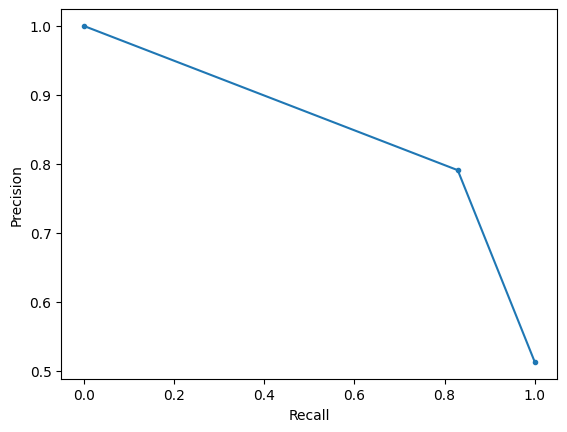

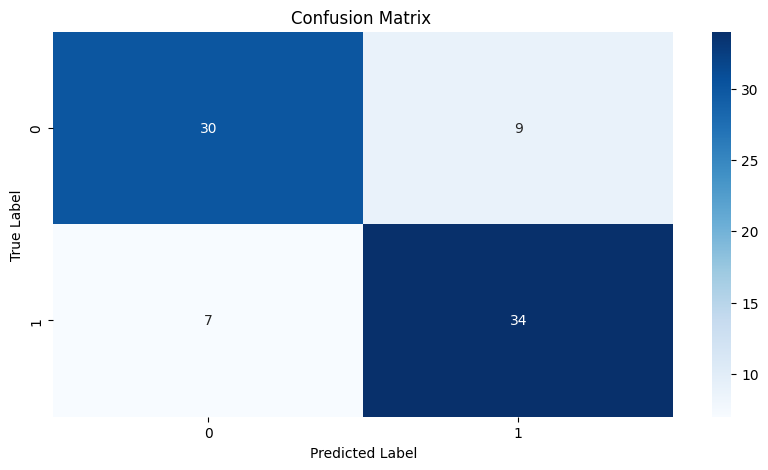

In [15]:
# write your code below to replace the ellipsis "..."
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print("Accuracy:",test_accuracy)
print("Precision:",precision_score(y_test, pred))
print("Recall:",recall_score(y_test, pred))
print("F1 score:",f1_score(y_test, pred))
print(classification_report(y_test, pred))
prec, recall, _ = metrics.precision_recall_curve(y_test,pred)
print("AUPRC score: {0}".format(metrics.auc(recall,prec)))
plt.plot(recall, prec, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
confusion_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

---
## Question 2: Regression (10 marks)

In this question you are given a simple dataset which you will perform regression on to predict values. You will build TWO Regression models and then take the best one and perform hyperparameter tuning on it.

## Set up the environment

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

## Read in the data

You'll need to download the data.csv file from https://ncl.instructure.com/courses/53509/files/7657710?wrap=1 and upload it to your Google Drive. I placed it in a folder called data. Then you need to mount your Google Drive in Colab (cell below).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then read in the data

In [ ]:
data = np.loadtxt('/content/drive/MyDrive/data.csv', delimiter=',')
print(data)

[[1.00000000e+00 9.00000000e+00 2.57259990e+00 2.49788633e+02]
 [1.00000000e+00 5.00000000e+00 9.21413366e+00 5.04502032e+02]
 [1.00000000e+00 1.70000000e+01 7.12330090e+00 1.33580225e+03]
 ...
 [5.00000000e+00 3.10000000e+01 6.80121067e+00 3.15979690e+03]
 [5.00000000e+00 1.00000000e+01 4.14995662e+00 6.21315789e+02]
 [5.00000000e+00 9.00000000e+00 9.61878173e+00 1.30105857e+03]]


## Q2.1 Split the data into X and y

X is the first three columns

y is the last column

In [ ]:
# your answer here
X=data[:,:3]
Y=data[:,3:]
print(X.shape)
print(Y.shape)

(1000, 3)
(1000, 1)


## Q2.2 Create the Train and Test datasets

20% of the data is kept back for testing

In [ ]:
# your answer here
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Q2.3 Use TWO Regression approaches on the dataset

In each case report the R^2 value against the test data.

Q2.3.1 Regression approach 1

In [ ]:
# your answer here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.8193775680949715


Q2.3.2 Regression approach 2

Using Lasso regression model.

In [ ]:
# your answer here
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))


0.8194942121107465


## Q2.4 Optimise the hyperparameters

Take your best Regression approach from above and identify the best hyperparameters. Note as some Regression approaches have many hyperparameters you may limit yourself here to just THREE.

Since Lasso classifier performance was the best one , we are doing tuning hyper parameters for same.

Q2.4.1 Search for the best hyperparameters

In [ ]:
# your answer here
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
model=Lasso()
param_grid = {
    'alpha': [ 10, 100],
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_score=r2_score(y_test, y_pred)
print(r2_score)

0.8204728896086286


Q2.4.2 Output the best hyperparameters found

In [ ]:
# your answer here
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'positive': True}


Q2.4.3 Show the results for the best model

In [ ]:
# your answer here
from sklearn.metrics import r2_score
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(r2_score(y_test, y_pred))

0.8204728896086286


---
## Question 3: Deep Learning (10 marks)

Q3.1 For MNIST dataset, implement a deep learning model with 3 hidden layers with layer size: 128, 256, 50.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
import keras.utils as utils

batch_size = 128
nb_classes = 10
im_dim = 784 # the total pixel number
nb_epoch = 2

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, im_dim)
X_test = X_test.reshape(10000, im_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Write down your code about MLP model for question Q3.1 here
# you should call your model 'model'
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Flatten(input_shape=(784,)),
    layers.Dense(128, activation='relu'),  #First Hidden Layer
    layers.Dense(256, activation='relu'),  #Second Hidden Layer
    layers.Dense(50, activation='relu'),   #Third Hidden Layer
    layers.Dense(10, activation='sigmoid')

])

Add code to output your network structure

In [ ]:
# your code here
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 50)                12850     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 146864 (573.69 KB)
Trainable params: 146864 (573.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model for just two epochs to show it works. All code provided - just run.

In [ ]:
# Train
model.fit(X_train, Y_train, epochs=nb_epoch,
                     validation_split = 0.2,
                     batch_size=batch_size, verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)


Epoch 1/2
375/375 [==============================] - 3s 8ms/step - loss: 0.0879 - accuracy: 0.9739 - val_loss: 0.1566 - val_accuracy: 0.9550
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9684
0.9684000015258789


Q 3.2 For MNIST dataset, implement a CNN model with only one 2D CNN layer as the hidden layer.

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# Write down your code about the CNN model of Q3.2 here
# you should call your model 'model'

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))


Add code to output your network structure

In [ ]:
# your code here
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (None, 50)                1081650   
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                      

We just train for two epochs to demonstrate that the network does work. Just run it.

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

Epoch 1/2
375/375 [==============================] - 46s 121ms/step - loss: 0.4742 - accuracy: 0.8526 - val_loss: 0.1131 - val_accuracy: 0.9679
Epoch 2/2
375/375 [==============================] - 45s 121ms/step - loss: 0.2256 - accuracy: 0.9313 - val_loss: 0.0849 - val_accuracy: 0.9762
Summary: Loss over the test dataset: 0.08, Accuracy: 0.97


---
---
---
#Mini-projects: Introduction

The remainder of this document defines four project-style questions which go more deeply into one of the areas from the module. You should pick **ONE** of these project-stye questions to answer.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with a choice of four different datasets of different nature
1. A tabular dataset (defined as a classification problem)
2. An image dataset
3. A text dataset
4. A time series dataset

Your job is easy to state: You should pick ONE out of these four options and design a range of machine learning pipelines appropriate to the nature of each of the selected datasets. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report should have 1000 to 2000 words. The word count excludes references, tables, figures and section headers, and has a 10% leeway.

## Marking scheme

- Writing Style, references, figures, etc. 7 marks
- Dataset exploration 7 marks
- Methods 21 marks
- Results of analysis 21 marks
- Discussion 14 marks

---
---
## Project 1: Tabular dataset (70 marks)

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

## Your answer below

#PROJECT 1- FARS DATASET

In the given project we are given with a dataset called FARS, which is a collection of Road Traffic Accidents happening across USA. The dataset gives us detailed understanding of the severity of the injury attained to a person because of Traffic Accident which is given in the last column of the dataset. We create a Machine learning pipeline to process the data and employ various machine learning models on the same to forecast the classifications of specific records within the FARS dataset.

# IMPORT LIBRARIES

Importing all the necessary libraries to read process data and apply our model.

Had to implement this code again on jupyter notebook to generate profile report as it was not supported on google colab.

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt

# Import Data

We used pandas library to import data from fars.csv and store in data.
We use data.columns to see the columns name in the dataset.

In [ ]:
data = pd.read_csv("fars.csv")
data.columns

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'INJURY_SEVERITY'],
      dtype='object')

# STEP 1: DATA ANALYSIS

## Displaying first five rows
data.head() is used to get the first 5 rows from a dataframe.

In [ ]:
data.head()

CASE_STATE  AGE     SEX                                PERSON_TYPE  \
0    Alabama   34    Male                                     Driver   
1    Alabama   20    Male                                     Driver   
2    Alabama   43    Male                                     Driver   
3    Alabama   38  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
4    Alabama   50    Male                                     Driver   

                        SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
0  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
1  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
2  Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   
3                Front_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
4  Front_Seat_-_Left_Side_(Drivers_Side)     Lap_and_Shoulder_Belt   

                    AIR_BAG_AVAILABILITY/DEPLOYMENT         EJECTION  \
0  Air_Bag_Available_but_Not_Deployed_for_this_Seat  Totally_Ejected   
1                       Deployed_Air_Bag_from_Front  Totally_Ejected   
2               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
3               Air_Bag_Not_Available_for_this_Seat      Not_Ejected   
4                       Deployed_Air_Bag_from_Front      Not_Ejected   

                EJECTION_PATH     EXTRICATION  ... DRUG_TEST_RESULTS_(2_of_3)  \
0                     Unknown  Not_Extricated  ...                          0   
1                     Unknown  Not_Extricated  ...                          0   
2  Not_Ejected/Not_Applicable      Extricated  ...                          0   
3  Not_Ejected/Not_Applicable      Extricated  ...                          0   
4  Not_Ejected/Not_Applicable  Not_Extricated  ...                          0   

  DRUG_TEST_TYPE_(3_of_3) DRUG_TEST_RESULTS_(3_of_3)  \
0    Not_Tested_for_Drugs                          0   
1    Not_Tested_for_Drugs                          0   
2    Not_Tested_for_Drugs                          0   
3    Not_Tested_for_Drugs                          0   
4    Not_Tested_for_Drugs                          0   

                   HISPANIC_ORIGIN  TAKEN_TO_HOSPITAL  \
0                     Non-Hispanic                 No   
1                     Non-Hispanic                 No   
2                     Non-Hispanic                 No   
3  Not_a_Fatality_(Not_Applicable)                Yes   
4                     Non-Hispanic                Yes   

                    RELATED_FACTOR_(1)-PERSON_LEVEL  \
0  Not_Applicable_-_Driver/None_-_All_Other_Persons   
1  Not_Applicable_-_Driver/None_-_All_Other_Persons   
2  Not_Applicable_-_Driver/None_-_All_Other_Persons   
3  Not_Applicable_-_Driver/None_-_All_Other_Persons   
4  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                    RELATED_FACTOR_(2)-PERSON_LEVEL  \
0  Not_Applicable_-_Driver/None_-_All_Other_Persons   
1  Not_Applicable_-_Driver/None_-_All_Other_Persons   
2  Not_Applicable_-_Driver/None_-_All_Other_Persons   
3  Not_Applicable_-_Driver/None_-_All_Other_Persons   
4  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                    RELATED_FACTOR_(3)-PERSON_LEVEL  \
0  Not_Applicable_-_Driver/None_-_All_Other_Persons   
1  Not_Applicable_-_Driver/None_-_All_Other_Persons   
2  Not_Applicable_-_Driver/None_-_All_Other_Persons   
3  Not_Applicable_-_Driver/None_-_All_Other_Persons   
4  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                              RACE      INJURY_SEVERITY  
0                            White         Fatal_Injury  
1                            White         Fatal_Injury  
2                            Black         Fatal_Injury  
3  Not_a_Fatality_(Not_Applicable)  Incapaciting_Injury  
4                            Black         Fatal_Injury  

[5 rows x 30 columns]

## Displaying Last five rows
data.tail() is used to get the last 5 rows from a dataframe.

In [ ]:
data.tail()

CASE_STATE  AGE     SEX                                PERSON_TYPE  \
100963    Wyoming   10  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100964    Wyoming    9  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100965    Wyoming    7  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100966    Wyoming    4  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100967    Wyoming   61    Male                                     Driver   

                             SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
100963                Second_Seat_-_Left_Side     Lap_and_Shoulder_Belt   
100964               Second_Seat_-_Right_Side     Lap_and_Shoulder_Belt   
100965                   Second_Seat_-_Middle                  Lap_Belt   
100966                   Second_Seat_-_Middle                  Lap_Belt   
100967  Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   

            AIR_BAG_AVAILABILITY/DEPLOYMENT     EJECTION  \
100963  Air_Bag_Not_Available_for_this_Seat  Not_Ejected   
100964  Air_Bag_Not_Available_for_this_Seat  Not_Ejected   
100965  Air_Bag_Not_Available_for_this_Seat  Not_Ejected   
100966  Air_Bag_Not_Available_for_this_Seat  Not_Ejected   
100967  Air_Bag_Not_Available_for_this_Seat  Not_Ejected   

                     EJECTION_PATH     EXTRICATION  ...  \
100963  Not_Ejected/Not_Applicable  Not_Extricated  ...   
100964  Not_Ejected/Not_Applicable  Not_Extricated  ...   
100965  Not_Ejected/Not_Applicable  Not_Extricated  ...   
100966  Not_Ejected/Not_Applicable  Not_Extricated  ...   
100967  Not_Ejected/Not_Applicable  Not_Extricated  ...   

       DRUG_TEST_RESULTS_(2_of_3) DRUG_TEST_TYPE_(3_of_3)  \
100963                          0    Not_Tested_for_Drugs   
100964                          0    Not_Tested_for_Drugs   
100965                          0    Not_Tested_for_Drugs   
100966                          0    Not_Tested_for_Drugs   
100967                          0    Not_Tested_for_Drugs   

       DRUG_TEST_RESULTS_(3_of_3)  \
100963                          0   
100964                          0   
100965                          0   
100966                          0   
100967                          0   

                                        HISPANIC_ORIGIN  TAKEN_TO_HOSPITAL  \
100963                  Not_a_Fatality_(Not_Applicable)                Yes   
100964                  Not_a_Fatality_(Not_Applicable)                Yes   
100965                  Not_a_Fatality_(Not_Applicable)                Yes   
100966                  Not_a_Fatality_(Not_Applicable)                Yes   
100967  Hispanic_-_Origin_Not_Specified_or_Other_Origin                 No   

                         RELATED_FACTOR_(1)-PERSON_LEVEL  \
100963  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100964  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100965  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100966  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100967  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                         RELATED_FACTOR_(2)-PERSON_LEVEL  \
100963  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100964  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100965  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100966  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100967  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                         RELATED_FACTOR_(3)-PERSON_LEVEL  \
100963  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100964  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100965  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100966  Not_Applicable_-_Driver/None_-_All_Other_Persons   
100967  Not_Applicable_-_Driver/None_-_All_Other_Persons   

                                   RACE  INJURY_SEVERITY  
100963  Not_a_Fatality_(Not_Applicable)  Possible_Injury  
100964  Not_a_Fatality_(Not_Applicable)  Possible_Injury  
100965  Not_a_Fatality_(Not_Applicable)  Possible_Injury  

## Describing all the numerical columns.

We use this function to get info about all the numerical columns in data frame.

In [ ]:
data.describe()

AGE  ALCOHOL_TEST_RESULT  DRUG_TEST_RESULTS_(1_of_3)  \
count  100968.000000        100968.000000               100968.000000   
mean       37.106707            68.023116                  207.393758   
std        22.109641            42.306371                  396.194002   
min         0.000000             0.000000                    0.000000   
25%        20.000000            15.000000                    0.000000   
50%        32.000000            96.000000                    0.000000   
75%        49.000000            96.000000                    1.000000   
max        99.000000            99.000000                  999.000000   

       DRUG_TEST_RESULTS_(2_of_3)  DRUG_TEST_RESULTS_(3_of_3)  
count               100968.000000               100968.000000  
mean                   100.089672                   95.441556  
std                    295.089512                  292.121277  
min                      0.000000                    0.000000  
25%                      0.000000                    0.000000  
50%                      0.000000                    0.000000  
75%                      0.000000                    0.000000  
max                    999.000000                  999.000000

## Check Missing Value
Checking for missing data in the dataframe.

In [ ]:
round(data.isnull().sum()/len(data)*100,2)

CASE_STATE                             0.0
AGE                                    0.0
SEX                                    0.0
PERSON_TYPE                            0.0
SEATING_POSITION                       0.0
RESTRAINT_SYSTEM-USE                   0.0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0.0
EJECTION                               0.0
EJECTION_PATH                          0.0
EXTRICATION                            0.0
NON_MOTORIST_LOCATION                  0.0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0.0
METHOD_ALCOHOL_DETERMINATION           0.0
ALCOHOL_TEST_TYPE                      0.0
ALCOHOL_TEST_RESULT                    0.0
POLICE-REPORTED_DRUG_INVOLVEMENT       0.0
METHOD_OF_DRUG_DETERMINATION           0.0
DRUG_TEST_TYPE_(1_of_3)                0.0
DRUG_TEST_RESULTS_(1_of_3)             0.0
DRUG_TEST_TYPE_(2_of_3)                0.0
DRUG_TEST_RESULTS_(2_of_3)             0.0
DRUG_TEST_TYPE_(3_of_3)                0.0
DRUG_TEST_RESULTS_(3_of_3)             0.0
HISPANIC_OR

# Shape of Dataframe
We use data.shape to find the shape i.e number of rows and columns in dataframe.

In [ ]:
data.shape

(100968, 30)

# Pandas Profiling Report
We generate a pandas profiling report on jupyter as this is not possible on google colab using the ydata profiling library. We get a better understanding of given data in aspects like correlations, duplicate, missing values, etc.
We analyze the report and decide on the next steps like removing duplicates rows , dropping nan values and also converting categorical data.

In [ ]:
report=ProfileReport(data,title='Pandas Profiling')
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the above report we learn about the various trends across the dataset. We learn that majority of the dataset has categorical data that needs to be encoded for using the data in our machine learning models, we also get to know that provided FARS dataset has alot of duplicate values that needs to be dropped for better performance of the model as not removing the duplicate rows may lead to biasing. We also get a better understanding of correlation between different features of the dataset which will help us do the further pre processing and normalization of our data.

## Histogram for Age Feature

We plot histogram for the Age feature to get a better understanding of the Age Data Segement, just to explore the data more.

<ipython-input-5-888d79f307f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AGE'], bins=50)


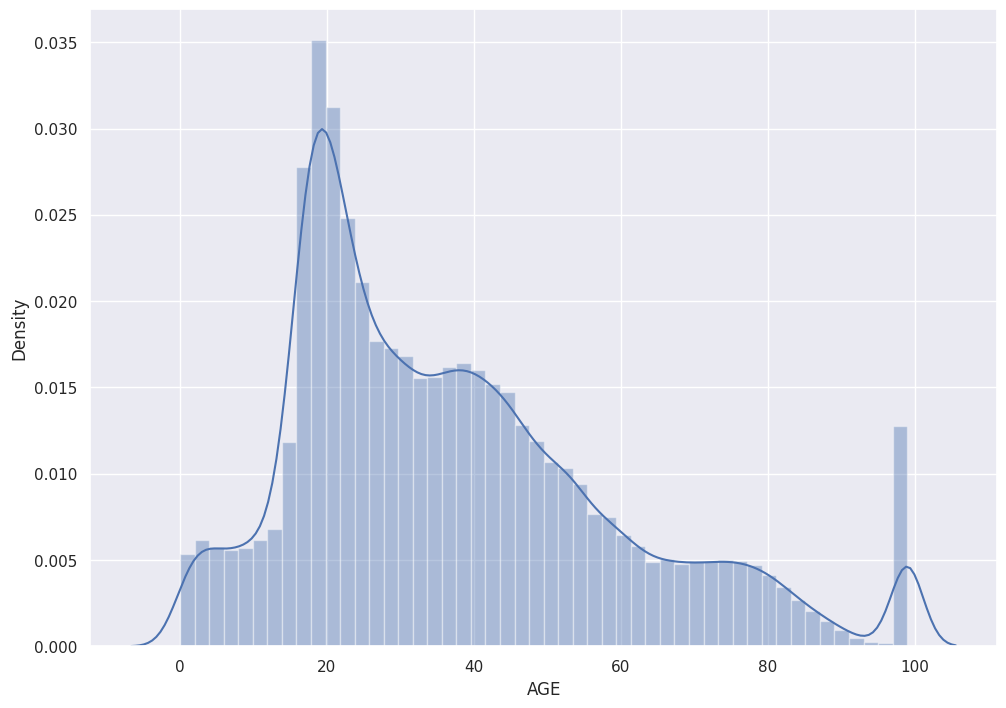

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['AGE'], bins=50)
plt.show()

We learn about the trend age group of people suffering from accidents in USA.

# STEP2: Pre Processing
## Dropping some columns that have least effect of the model

Commented this approach as dropping the below columns had a very limited impact on the performance of the model.

In [ ]:
# data.drop(['EJECTION_PATH','EXTRICATION','METHOD_ALCOHOL_DETERMINATION','ALCOHOL_TEST_TYPE','METHOD_OF_DRUG_DETERMINATION', 'HISPANIC_ORIGIN','RACE'], axis=1, inplace=True)

## Drop Duplicate Rows

We drop Duplicate rows to clean the data for further processing as duplicate rows might lead to biasing of the model if not dropped.

In [ ]:
data.drop_duplicates(inplace= True)


Shape after dropping duplicate rows from the dataframe.

In [ ]:
data.shape

(93004, 30)

## One-Hot Encoding technique + LabelEncoding(Last Column)
One-Hot Encoding is a technique used to convert categorical variables into a binary matrix format.
Label Encoding is a technique used to convert categorical data into numerical form.
In the below code firstly we drop the column that are already in binary or numerical data.
Then take remaining categorical columns and apply one hot ecoding technique to convert the data into binary form. Setting sparse_output to False forces the encoder to return a dense array instead of a sparse matrix.
This process increases the number of features in our dataframe. We apply label encoding on the last column of the dataframe and concatenate our original dataframe with data obtained after applying encoding techniques.
This technique helps apply our data in machine learning models that require numerical input.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
data['INJURY_SEVERITY']= le.fit_transform(data['INJURY_SEVERITY'])
columns_to_drop = ['AGE', 'INJURY_SEVERITY','ALCOHOL_TEST_RESULT','DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_RESULTS_(3_of_3)']
df_temp = data.drop(columns=columns_to_drop)
column_to_drop = data['INJURY_SEVERITY']
categorical_columns = df_temp.select_dtypes(include=['object']).columns
df_subset = df_temp[categorical_columns]
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_subset)
df_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(df_subset.columns))
includecolumn=data[['AGE','ALCOHOL_TEST_RESULT','DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_RESULTS_(3_of_3)']]
includecolumn.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)
df_new = pd.concat([includecolumn,df_encoded], axis=1)
df_new.reset_index(drop=True, inplace=True)
column_to_drop.reset_index(drop=True, inplace=True)
data = pd.concat([df_new,column_to_drop], axis=1)

Most of the columns in our original dataframe where categorical data , which we can't supply directly to our machine learning model so we make use of one hot encoding to encode the categorical columns leaving the numerical column except the last column on which we apply label encoding to encode.
After processing we copy the data back to our original dataframe.

We check the data obtained after applying the encoding technique and find the number of columns to be increased .

In [ ]:
data.shape

(93004, 363)

We check the first five columns of encoded data.

In [ ]:
data.head()

AGE  ALCOHOL_TEST_RESULT  DRUG_TEST_RESULTS_(1_of_3)  \
0   34                   97                         999   
1   20                   96                           0   
2   43                   96                           0   
3   38                   96                           0   
4   50                   97                         999   

   DRUG_TEST_RESULTS_(2_of_3)  DRUG_TEST_RESULTS_(3_of_3)  CASE_STATE_Alabama  \
0                           0                           0                 1.0   
1                           0                           0                 1.0   
2                           0                           0                 1.0   
3                           0                           0                 1.0   
4                           0                           0                 1.0   

   CASE_STATE_Alaska  CASE_STATE_Arizona  CASE_STATE_Arkansas  \
0                0.0                 0.0                  0.0   
1                0.0                 0.0                  0.0   
2                0.0                 0.0                  0.0   
3                0.0                 0.0                  0.0   
4                0.0                 0.0                  0.0   

   CASE_STATE_California  ...  RACE_Korean  \
0                    0.0  ...          0.0   
1                    0.0  ...          0.0   
2                    0.0  ...          0.0   
3                    0.0  ...          0.0   
4                    0.0  ...          0.0   

   RACE_Multiple_Races_(Individual_races_not_specified;_ex._mixed)  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0                 

   RACE_Not_a_Fatality_(Not_Applicable)  RACE_Other_Asian_or_Pacific_Islander  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   1.0                                   0.0   
4                                   0.0                                   0.0   

   RACE_Other_Indian_(Includes_South_and_Central_America)  RACE_Samoan  \
0                                                0.0               0.0   
1                                                0.0               0.0   
2                                                0.0               0.0   
3                                                0.0               0.0   
4                                                0.0               0.0   

   RACE_Unknown  RACE_Vietnamese  RACE_White  INJURY_SEVERITY  
0           0.0              0.0         1.0                1  
1           0.0              0.0         1.0                1  
2           0.0              0.0         0.0                1  
3           0.0              0.0         0.0                2  
4           0.0              0.0         0.0                1  

[5 rows x 363 columns]

We check the last five columns of encoded data.

In [ ]:
data.tail()

AGE  ALCOHOL_TEST_RESULT  DRUG_TEST_RESULTS_(1_of_3)  \
92999   10                   96                           0   
93000    9                   96                           0   
93001    7                   96                           0   
93002    4                   96                           0   
93003   61                   96                           0   

       DRUG_TEST_RESULTS_(2_of_3)  DRUG_TEST_RESULTS_(3_of_3)  \
92999                           0                           0   
93000                           0                           0   
93001                           0                           0   
93002                           0                           0   
93003                           0                           0   

       CASE_STATE_Alabama  CASE_STATE_Alaska  CASE_STATE_Arizona  \
92999                 0.0                0.0                 0.0   
93000                 0.0                0.0                 0.0   
93001                 0.0                0.0                 0.0   
93002                 0.0                0.0                 0.0   
93003                 0.0                0.0                 0.0   

       CASE_STATE_Arkansas  CASE_STATE_California  ...  RACE_Korean  \
92999                  0.0                    0.0  ...          0.0   
93000                  0.0                    0.0  ...          0.0   
93001                  0.0                    0.0  ...          0.0   
93002                  0.0                    0.0  ...          0.0   
93003                  0.0                    0.0  ...          0.0   

       RACE_Multiple_Races_(Individual_races_not_specified;_ex._mixed)  \
92999                                                0.0                 
93000                                                0.0                 
93001                                                0.0                 
93002                                                0.0                 
93003                                                0.0                 

       RACE_Not_a_Fatality_(Not_Applicable)  \
92999                                   1.0   
93000                                   1.0   
93001                                   1.0   
93002                                   1.0   
93003                                   0.0   

       RACE_Other_Asian_or_Pacific_Islander  \
92999                                   0.0   
93000                                   0.0   
93001                                   0.0   
93002                                   0.0   
93003                                   0.0   

       RACE_Other_Indian_(Includes_South_and_Central_America)  RACE_Samoan  \
92999                                                0.0               0.0   
93000                                                0.0               0.0   
93001                                                0.0               0.0   
93002                                                0.0               0.0   
93003                                                0.0               0.0   

       RACE_Unknown  RACE_Vietnamese  RACE_White  INJURY_SEVERITY  
92999           0.0              0.0         0.0                6  
93000           0.0              0.0         0.0                6  
93001           0.0              0.0         0.0                6  
93002           0.0              0.0         0.0                6  
93003           0.0              0.0         1.0                1  

[5 rows x 363 columns]


## Drop
We use the below block to drop some rows with missing data in dataframe.
Commenting this approach as the new onehotencoding technique implemented has proven to generate zero nan values.

In [ ]:
# # drop
# data.dropna(inplace=True)
# data.shape

(85455, 363)

## Summary of dataframe
Data.describe generates descriptive statistics that include measures of central tendency, dispersion, and shape of the distribution of a dataset. The output is a DataFrame with various statistical metrics calculated for each numeric column in the original DataFrame.

In [ ]:
data.describe()


AGE  ALCOHOL_TEST_RESULT  DRUG_TEST_RESULTS_(1_of_3)  \
count  93004.000000         93004.000000                93004.000000   
mean      36.629435            65.978979                  213.110264   
std       21.311864            43.072608                  399.577366   
min        0.000000             0.000000                    0.000000   
25%       20.000000            12.000000                    0.000000   
50%       32.000000            96.000000                    0.000000   
75%       49.000000            96.000000                    1.000000   
max       99.000000            99.000000                  999.000000   

       DRUG_TEST_RESULTS_(2_of_3)  DRUG_TEST_RESULTS_(3_of_3)  \
count                93004.000000                93004.000000   
mean                    99.927465                   94.881328   
std                    294.449580                  291.212425   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                    999.000000                  999.000000   

       CASE_STATE_Alabama  CASE_STATE_Alaska  CASE_STATE_Arizona  \
count        93004.000000       93004.000000        93004.000000   
mean             0.021687           0.002236            0.028633   
std              0.145661           0.047239            0.166774   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              0.000000           0.000000            0.000000   
max              1.000000           1.000000            1.000000   

       CASE_STATE_Arkansas  CASE_STATE_California  ...   RACE_Korean  \
count         93004.000000           93004.000000  ...  93004.000000   
mean              0.014774               0.093028  ...      0.000290   
std               0.120646               0.290474  ...      0.017036   
min               0.000000               0.000000  ...      0.000000   
25%               0.000000               0.000000  ...      0.000000   
50%               0.000000               0.000000  ...      0.000000   
75%               0.000000               0.000000  ...      0.000000   
max               1.000000               1.000000  ...      1.000000   

       RACE_Multiple_Races_(Individual_races_not_specified;_ex._mixed)  \
count                                       93004.000000                 
mean                                            0.000075                 
std                                             0.008675                 
min                                             0.000000                 
25%                                             0.000000                 
50%                                             0.000000                 
75%                                             0.000000                 
max                                             1.000000                 

       RACE_Not_a_Fatality_(Not_Applicable)  \
count                          93004.000000   
mean                               0.554342   
std                                0.497041   
min                                0.000000   
25%                                0.000000   
50%                                1.000000   
75%                                1.000000   
max                                1.000000   

       RACE_Other_Asian_or_Pacific_Islander  \
count                          93004.000000   
mean                               0.000699   
std                                0.026428   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

    

## Missing data

Checks for missing values in the dataframe after applying encoding technique.

In [ ]:
round(data.isnull().sum()/len(data)*100,2)

AGE                           0.0
ALCOHOL_TEST_RESULT           0.0
DRUG_TEST_RESULTS_(1_of_3)    0.0
DRUG_TEST_RESULTS_(2_of_3)    0.0
DRUG_TEST_RESULTS_(3_of_3)    0.0
                             ... 
RACE_Samoan                   0.0
RACE_Unknown                  0.0
RACE_Vietnamese               0.0
RACE_White                    0.0
INJURY_SEVERITY               0.0
Length: 363, dtype: float64

# Count of each injury severity

Count of each label as defined in injury severity columns

In [ ]:
data.groupby("INJURY_SEVERITY").count()

AGE  ALCOHOL_TEST_RESULT  DRUG_TEST_RESULTS_(1_of_3)  \
INJURY_SEVERITY                                                           
0                    9                    9                           9   
1                41442                41442                       41442   
2                14230                14230                       14230   
3                  233                  233                         233   
4                15642                15642                       15642   
5                12945                12945                       12945   
6                 8104                 8104                        8104   
7                  399                  399                         399   

                 DRUG_TEST_RESULTS_(2_of_3)  DRUG_TEST_RESULTS_(3_of_3)  \
INJURY_SEVERITY                                                           
0                                         9                           9   
1                                     41442                       41442   
2                                     14230                       14230   
3                                       233                         233   
4                                     15642                       15642   
5                                     12945                       12945   
6                                      8104                        8104   
7                                       399                         399   

                 CASE_STATE_Alabama  CASE_STATE_Alaska  CASE_STATE_Arizona  \
INJURY_SEVERITY                                                              
0                                 9                  9                   9   
1                             41442              41442               41442   
2                             14230              14230               14230   
3                               233                233                 233   
4                             15642              15642               15642   
5                             12945              12945               12945   
6                              8104               8104                8104   
7                               399                399                 399   

                 CASE_STATE_Arkansas  CASE_STATE_California  ...  \
INJURY_SEVERITY                                              ...   
0                                  9                      9  ...   
1                              41442                  41442  ...   
2                              14230                  14230  ...   
3                                233                    233  ...   
4                              15642                  15642  ...   
5                              12945                  12945  ...   
6                               8104                   8104  ...   
7                                399                    399  ...   

                 RACE_Japanese  RACE_Korean  \
INJURY_SEVERITY                               
0                            9            9   
1                        41442        41442   
2                        14230        14230   
3                          233          233   
4                        15642        15642   
5                        12945        12945   
6                         8104         8104   
7                          399          399   

                 RACE_Multiple_Races_(Individual_races_not_specified;_ex._mixed)  \
INJURY_SEVERITY                                                                    
0                                                                9                 
1                                                            41442                 
2                                                            14230                 
3                                                              233                 
4                                                            15642              

## Split the data into X and y
We divide the data into features stored in X and labels stored in y to train our ml model, where y conatins the label data and X contains rest of the columns.

In [ ]:
X = data.drop(columns=['INJURY_SEVERITY'])
y = data["INJURY_SEVERITY"]

## Check the columns of X and y

Printing out the column in the dataframes to get a better understanding of data split.

In [ ]:
print(X.columns)
print(y.name)

Index(['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'CASE_STATE_Alabama', 'CASE_STATE_Alaska', 'CASE_STATE_Arizona',
       'CASE_STATE_Arkansas', 'CASE_STATE_California',
       ...
       'RACE_Japanese', 'RACE_Korean',
       'RACE_Multiple_Races_(Individual_races_not_specified;_ex._mixed)',
       'RACE_Not_a_Fatality_(Not_Applicable)',
       'RACE_Other_Asian_or_Pacific_Islander',
       'RACE_Other_Indian_(Includes_South_and_Central_America)', 'RACE_Samoan',
       'RACE_Unknown', 'RACE_Vietnamese', 'RACE_White'],
      dtype='object', length=362)
INJURY_SEVERITY


## Splitting data into training and testing dataset

In the below block we divide our data X and y , where y is the label or traget which we have splits early from our dataframe into training and testing data set where 20 % data is reserved for testing and rest for training.The random_state parameter ensures that the split is consistent across different runs, making the results reproducible.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Select K-best Features

SelectKBest is a univariate feature selection method in scikit-learn that selects the top k features based on their scores from a specified scoring function.We use the mutual_info_classif scoring function in scikit-learn's SelectKBest feature selection method to identify and retain the top 250 most informative features from the training dataset. The transformed datasets, contain only these selected features, enhancing the model's predictive capabilities by selecting only the most relevant features. Adjustments to the parameter k allow for flexibility in choosing the desired number of features to retain.

We experiemented using different value for k and found the accuracy to be the best when retaining only top 250 features from the whole dataset.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
k = 250
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
selected_feature_indices = selector.get_support(indices=True)
print("Indices of selected features:", selected_feature_indices)

Indices of selected features: [  0   1   2   3   4   5   6   7  11  12  13  16  19  22  23  25  27  29
  30  32  33  35  36  37  38  40  41  42  43  45  46  49  51  52  53  55
  56  57  58  59  60  61  63  65  66  67  70  72  73  74  75  77  78  82
  83  84  85  86  88  90  93  94  96  97  98  99 100 101 102 103 104 105
 106 107 109 111 112 113 115 116 117 118 119 120 121 122 123 124 125 126
 127 130 131 133 134 135 136 137 138 141 143 144 147 148 149 151 152 153
 154 155 156 157 158 159 160 161 162 165 166 168 170 172 175 177 178 179
 182 183 185 186 187 188 189 190 191 192 194 199 200 201 202 203 204 206
 207 208 210 211 212 213 214 215 216 217 220 222 224 225 228 229 231 232
 233 234 235 236 240 243 244 245 246 248 250 251 252 256 257 258 259 260
 261 262 263 266 271 274 275 277 278 282 283 284 286 288 289 290 291 292
 296 300 302 303 304 305 306 307 309 310 312 313 315 316 317 321 322 323
 326 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 

Shape of the X_train dataframe after selecting top 250 features.

In [ ]:
X_train.shape

(74403, 250)

## SMOTE - Oversampling technique
Technique to increase the train data for all the classes. SMOTE helps to uniformily scale the data across all classes if any class is underepresented. This helps to improve class distribution enhancing model recall, precision, and accuracy.
After implementing both SMOTE and ADASYN, the model showed superior performance with oversampled data from SMOTE compared to ADASYN. While ADASYN's adaptivity is advantageous in addressing unevenly represented classes, in this specific scenario, the uniform sampling strategy employed by SMOTE proved to be more effective.
We also experimented using random scaler technique and found the overall performance of adasyn and smote to be more efficient.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
smote = SMOTE(k_neighbors=1)
x_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))
print(type(x_smote))

Original dataset shape Counter({1: 33224, 4: 12534, 2: 11349, 5: 10330, 6: 6454, 7: 313, 3: 194, 0: 5})
Resample dataset shape Counter({4: 33224, 1: 33224, 5: 33224, 6: 33224, 2: 33224, 7: 33224, 3: 33224, 0: 33224})
<class 'numpy.ndarray'>


## Min Max Scaling
Scaling methods in machine learning, such as Min Max Scaling transform numerical features to a consistent scale. Min-Max Scaling can be more efficient than Standard Scaling when the range of feature values varies significantly.For instance, while age spans from 20 to 99, many category entries predominantly have values of 1 or 0. This disparity in scales could potentially impact the performance of the machine learning model.
We also explored the impact of Standard Scaling and ultimately, upon implementing both approaches, observed that Min-Max Scaling had a more favorable effect on the model's performance.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
scaler.fit(x_smote)
scaled_features = scaler.transform(x_smote)
df = pd.DataFrame(scaled_features)
print(df)
scaler.fit(X_test)
X_test_sc = scaler.transform(X_test)
X_test_sc=pd.DataFrame(X_test_sc)


             0         1         2    3    4    5    6         7    8    9    \
0       0.464646  0.969697  1.000000  1.0  1.0  0.0  0.0  0.000000  0.0  0.0   
1       0.363636  0.969697  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2       0.080808  1.000000  1.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3       0.565657  0.000000  0.001001  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
4       0.212121  0.969697  0.000000  0.0  0.0  0.0  1.0  0.000000  0.0  0.0   
...          ...       ...       ...  ...  ...  ...  ...       ...  ...  ...   
265787  1.000000  0.969697  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
265788  1.000000  0.969697  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
265789  0.492284  1.000000  1.000000  0.0  0.0  0.0  0.0  0.421279  0.0  0.0   
265790  1.000000  0.969697  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
265791  1.000000  0.969697  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

        ...  240  241  242  243  244  2

## Scaled Testing data

We check the shape of the Scaled Test data.

In [ ]:
X_test_sc.shape

(18601, 250)

## Scaled Training data

We check the shape of Scaled Training Data.

In [ ]:
df.shape

(265792, 250)

## Principal Component Analysis(PCA)

Principal Component Analysis is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional representation by identifying and preserving the most important features.We apply PCA to our data obtained after scaling for dimensionality reduction, reducing computational complexity.It transforms features into uncorrelated principal components, preserving most of the data's variance while simplifying models and improving performance.PCA is used here to reduce the dimensionality of the DataFrame 'df' while retaining 95% of the variance.
After Applying PCA on the data ,we witnessed a better accuracy from logistics and knn models.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
df = pca.fit_transform(df)
X_test_sc = pca.transform(X_test_sc)

#  STEP 3: TRAINING OUR MODELS

## KNN

A flexible and user-friendly machine learning approach for classification and regression applications is KNN. Based on the average value or majority class of its k-nearest data points in the feature space, it uses the proximity principle to classify or predict. KNN can be used in a variety of applications because it is non-parametric and flexible, albeit it can be affected by the number of neighbors and the distance metric selected.
We firstly divide our data, wherein 80% of the data is used for training and rest for testing the model.We sets up a KNN classification model, trains it on the training data, and then uses it to predict labels for the test data. We obtain a accuracy of 75 % model when we use data obtained after performing scaling and imbalance correction.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df,y_smote)
pred = knn.predict(X_test_sc)
print("accuracy",accuracy_score(y_test,pred))
print(classification_report(y_test,pred, zero_division=1))
print(confusion_matrix(y_test, pred))

accuracy 0.7450137089403795
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.51      0.53      0.52      2881
           3       0.16      0.36      0.22        39
           4       0.83      0.87      0.85      3108
           5       0.40      0.41      0.41      2615
           6       0.25      0.20      0.22      1650
           7       0.40      0.41      0.40        86

    accuracy                           0.75     18601
   macro avg       0.44      0.47      0.45     18601
weighted avg       0.74      0.75      0.74     18601

[[   0    0    0    0    4    0    0    0]
 [   0 8197    7    1    7    1    1    4]
 [   0    0 1519   30    6 1010  314    2]
 [   0    0   13   14    1    8    3    0]
 [   2    1   13    7 2699   51  298   37]
 [   0    1 1034   22  100 1063  391    4]
 [   0    1  406   12  405  490  331    5]
 [   0    1    3    

## Logistic Regression

Logistic Regression is a binary classification algorithm that models the probability of an instance belonging to a class. Implementing a machine learning model with raw data involves training the Logistic Regression model directly on the original features. However, to address sensitivity to feature scales, implementing the same model on scaled data becomes important. Scaling techniques like Min-Max scaling ensure features are on similar scales, enhancing model stability and performance, particularly when features have different ranges. This ensures a more reliable and accurate logistic regression model for classification tasks.
After running the model we get an accuracy of around 76% , which is better than decision tree classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
classifier = LogisticRegression(random_state = 2,max_iter=1000)
classifier.fit(df,y_smote)
log_pred = classifier.predict(X_test_sc)
print("accuracy",accuracy_score(y_test,log_pred))
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

accuracy 0.7628622117090479
              precision    recall  f1-score   support

           0       0.03      0.25      0.05         4
           1       1.00      1.00      1.00      8218
           2       0.59      0.55      0.57      2881
           3       0.07      0.77      0.13        39
           4       0.84      0.90      0.87      3108
           5       0.47      0.44      0.45      2615
           6       0.33      0.19      0.25      1650
           7       0.17      0.84      0.29        86

    accuracy                           0.76     18601
   macro avg       0.44      0.62      0.45     18601
weighted avg       0.77      0.76      0.76     18601

[[   1    0    0    0    2    0    0    1]
 [   0 8215    0    0    0    0    0    3]
 [   7    0 1592  180    1  853  231   17]
 [   1    0    0   30    1    6    1    0]
 [  14    0    3    5 2810   10   86  180]
 [   7    0  826  143   94 1149  323   73]
 [   8    0  297   63  440  449  321   72]
 [   0    1    0    

## DECISION TREE

A decision tree represents a sequential set of choices made to achieve a specific objective, guiding the categorization of data samples from the root to leaf nodes based on learned decision rules. By employing the decision tree technique, predictions of class labels can be made after training on data, extracting decision-making principles from the training set. The model's accuracy significantly improved with the introduction of oversampled SMOTE data, enhancing training with a substantial sample size from each of the eight classes while maintaining balance. The accuracy rating was commendable, achieving 74% using the augmented SMOTE data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
model = DecisionTreeClassifier()
model.fit(x_smote, y_smote)
pred = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred, zero_division=1))
print(r2_score(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.51      0.54      0.52      2881
           3       0.19      0.18      0.18        39
           4       0.82      0.83      0.83      3108
           5       0.38      0.37      0.38      2615
           6       0.22      0.20      0.21      1650
           7       0.43      0.37      0.40        86

    accuracy                           0.74     18601
   macro avg       0.44      0.44      0.44     18601
weighted avg       0.73      0.74      0.73     18601

0.438909247832202
[[   0    0    0    0    4    0    0    0]
 [   0 8216    0    0    0    0    0    2]
 [   0    0 1543    9    8  990  330    1]
 [   0    0   16    7    1   10    5    0]
 [   3    0    8    3 2587  100  384   23]
 [   0    0 1082   11  107  975  434    6]
 [   0    0  399    5  401  504  330   11]
 [   0    1    2    2   41    

## Random Forest
A Random Forest classifier exemplifies ensemble learning by aggregating predictions from multiple decision tree algorithms. The model is trained on SMOTE training data. After training on synthetic data, predictions are validated using test data. After using SMOTE, the model achieving an accuracy of 75, as evidenced by the confusion matrix, which reveals a notable number of true positive values.

We don't provide scaled data to random forest classifier as random Forest is a tree-based ensemble model that is generally less sensitive to the scale of features compared to linear models. We also don't provide PCA data beacuse if you apply PCA to the data before feeding it to Random Forest, you may lose some of the information captured by the ensemble.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
model = RandomForestClassifier(n_estimators=100)
model.fit(x_smote, y_smote)
pred = model.predict(X_test)
print("accuracy",accuracy_score(y_test,pred))
print(classification_report(y_test,pred, zero_division=1))
print(confusion_matrix(y_test,pred))

accuracy 0.7511961722488039
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.52      0.55      0.53      2881
           3       0.17      0.15      0.16        39
           4       0.82      0.88      0.85      3108
           5       0.40      0.41      0.41      2615
           6       0.25      0.19      0.22      1650
           7       0.56      0.36      0.44        86

    accuracy                           0.75     18601
   macro avg       0.47      0.44      0.45     18601
weighted avg       0.74      0.75      0.75     18601

[[   0    0    0    0    4    0    0    0]
 [   0 8216    0    0    0    0    0    2]
 [   0    0 1575   15    4 1011  276    0]
 [   0    0   12    6    1   14    6    0]
 [   2    0    4    0 2750   53  284   15]
 [   0    0 1037    9  114 1075  376    4]
 [   0    0  384    6  422  515  320    3]
 [   0    1    3    

# STEP 4: Hyperparameters Tuning

Hyperparameters in machine learning models are manually set configuration settings that influence a model's behavior. Tuning these hyperparameters is essential for optimizing model performance, controlling complexity, and ensuring generalization to new, unseen data. Properly chosen hyperparameters enhance efficiency, mitigate overfitting or underfitting, and adapt the model to the unique characteristics of a dataset.

## Applying Hyperparameters on Decision Tree Classifier

We implemented different combinations of hyperparameter while tuning our model and found the below outputted hyper parameters to be the best fit among a variety of hyperparemters. We Restricted the number of hyperparameters supplied to our model to three to limit the exceution time. As the model was a taking a lot of time when we supplied 4-5 hyperparameters to test for it's performance. The model achieved an accuracy of 74%.
After comparing the models accuracy before and after tuning hyper parameters we found the accuracy to remain around the same.
We could try and experiment by using different hyperparameter to tune the model to achieve higher accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_smote, y_smote)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(test_accuracy)
print(best_params)
print(classification_report(y_test,y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))


0.7368421052631579
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.51      0.54      0.52      2881
           3       0.21      0.21      0.21        39
           4       0.82      0.83      0.83      3108
           5       0.38      0.38      0.38      2615
           6       0.22      0.20      0.21      1650
           7       0.46      0.42      0.44        86

    accuracy                           0.74     18601
   macro avg       0.45      0.45      0.45     18601
weighted avg       0.73      0.74      0.73     18601

[[   0    0    0    0    4    0    0    0]
 [   0 8215    0    0    0    0    0    3]
 [   0    0 1548   11    9  993  320    0]
 [   0    0   14    8    1   10    6    0]
 [   2    0    8    2 2593   98  382   23]
 [   0    0 1079   12  107  981  430    6]
 [   

## Applying Hyperparameters on Random Forest Classifier
We implemented different combinations of hyperparameter while tuning our model and found the below outputted hyper parameters to be the best fit among a variety of hyperparemters. We Restricted the number of hyperparameters supplied to our model to two to limit the exceution time. As the model was a taking a lot of time when we supplied 3-4 hyperparameters to test for it's performance. The model was able to get an accuracy of 75 %. After comparing the models accuracy before and after tuning hyper parameters we found the accuracy to remain around the same. We could try and experiment by using different hyperparameter to tune the model to achieve higher accuracy.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
param_grid = {
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_smote, y_smote)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print(test_accuracy)
print(best_params)
print(classification_report(y_test,pred, zero_division=1))
print(confusion_matrix(y_test, pred))

0.7505510456427074
{'max_depth': None, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00      8218
           2       0.52      0.55      0.54      2881
           3       0.19      0.18      0.18        39
           4       0.82      0.88      0.85      3108
           5       0.40      0.41      0.40      2615
           6       0.25      0.19      0.21      1650
           7       0.56      0.36      0.44        86

    accuracy                           0.75     18601
   macro avg       0.47      0.45      0.45     18601
weighted avg       0.74      0.75      0.75     18601

[[   0    0    0    0    4    0    0    0]
 [   0 8216    0    0    0    0    0    2]
 [   0    0 1584   15    4 1002  276    0]
 [   0    0   12    7    1   13    6    0]
 [   2    0    4    0 2746   65  277   14]
 [   0    0 1038    9  114 1065  384    5]
 [   0    0  380    6  429  

## Applying Hyperparameters on LogisticRegression
We implemented different combinations of hyperparameter while tuning our model and found the below outputted hyper parameters to be the best fit among a variety of hyperparemters. We Restricted the number of hyperparameters supplied to our model to two to limit the exceution time. As the model was a taking a lot of time when we supplied 3-4 hyperparameters to test for it's performance. The model achieved the same accuracy as of logistic regression without hyper parameter which may be because of poor selection of hyper parameter. We can try and experiment by using different set of hyperparameter to acheieve a highe accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

param_grid = {
'fit_intercept': [True, False],
    'n_jobs': [1, -1]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(df, y_smote)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, pred)
print(test_accuracy)
print(best_params)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

0.7628622117090479
{'fit_intercept': True, 'n_jobs': -1}
              precision    recall  f1-score   support

           0       0.03      0.25      0.05         4
           1       1.00      1.00      1.00      8218
           2       0.59      0.55      0.57      2881
           3       0.07      0.77      0.13        39
           4       0.84      0.90      0.87      3108
           5       0.47      0.44      0.45      2615
           6       0.33      0.19      0.25      1650
           7       0.17      0.84      0.29        86

    accuracy                           0.76     18601
   macro avg       0.44      0.62      0.45     18601
weighted avg       0.77      0.76      0.76     18601

[[   1    0    0    0    2    0    0    1]
 [   0 8215    0    0    0    0    0    3]
 [   7    0 1592  180    1  853  231   17]
 [   1    0    0   30    1    6    1    0]
 [  14    0    3    5 2810   10   86  180]
 [   7    0  826  143   94 1149  323   73]
 [   8    0  297   63  440  449  3

## Applying Hyperparameters on KNN

We tried tuning hyperparemeter for KNN classifier but we were not able to get results after runnning the models for hours, as KNN faces difficulty when dealing with a big amount of data , so here I'm not considering to perform hyperparameter tuning .

# STEP 5:Cross Validation



Cross-validation is a crucial technique for validating the generalizability of a machine learning model by assessing its performance on unseen data. Instead of a single fixed train-test split, K-fold cross-validation involves iteratively partitioning the data into training and testing sets across multiple iterations. In this process, the model is trained and evaluated on distinct data subsets, providing a more robust evaluation of its predictive capabilities. The K-fold strategy, employed in eight iterations, randomly selects training and testing data, ensuring comprehensive coverage and reducing the impact of data partitioning variability.

## Cross Validation on RandomForest Classifier
Random Forest Classifier to perform 8-fold cross-validation KFold on the features and labels.The obtained cross validation scores provide an indication of how well the model generalizes to unseen data across different folds, with the average representing an overall performance metric. Higher scores generally imply better model performance. The Random forest Classifier performed better than most models while performing cross validation which makes it a suitable models to apply for this data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold
model = RandomForestClassifier()
kf=KFold(n_splits=8)
score=cross_val_score(model,x_smote,y_smote,cv=kf)
mean=score.mean()
print("Cross Validation Scores:",score)
print("Average Cross Validation score:",mean)

Cross Validation Scores: [0.82428365 0.8208223  0.95136046 0.6532627  0.99431134 0.80402721
 0.41713821 0.48467975]
Average Cross Validation score: 0.7437357031061882


## Cross Validation on Decision Tree Classifier
Decision Tree Classifier to perform 8-fold cross-validation KFold on the features and labels.The obtained cross validation scores provide an indication of how well the model generalizes to unseen data across different folds, with the average representing an overall performance metric. Higher scores generally imply better model performance.
These scores suggest that the model exhibits variability in its performance across different subsets of the data. While some folds show higher accuracy, others are lower, showing varying nature across each folds.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
kf=KFold(n_splits=8)
score=cross_val_score(model,x_smote, y_smote,cv=kf)
mean=score.mean()
print("Cross Validation Scores:",score)
print("Average Cross Validation score:",mean)

Cross Validation Scores: [0.8088731  0.80164941 0.94768842 0.66548278 0.98498074 0.78085119
 0.47790754 0.47793764]
Average Cross Validation score: 0.7431713520346737


## Cross Validation on Logistic Regression Classifier
Logistic Regression Classifier to perform 8-fold cross-validation KFold on the features and labels.The obtained cross validation scores provide an indication of how well the model generalizes to unseen data across different folds, with the average representing an overall performance metric. Higher scores generally imply better model performance.

The Overall Validation score was low as compared to other models like Random forest and decision tree classifiers.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 2,max_iter=1000)
kf = KFold(n_splits=8)
score = cross_val_score(model, df, y_smote, cv=kf)
mean=score.mean()
print("Cross Validation Scores:",score)
print("Average Cross Validation score:",mean)

Cross Validation Scores: [0.76038406 0.75800626 0.94215025 0.42767277 0.62415724 0.42186371
 0.10483386 0.22980376]
Average Cross Validation score: 0.5336089874789309


## Cross Validation on KNN
KNN Classifier to perform 8-fold cross-validation KFold on the features and labels.The obtained cross validation scores provide an indication of how well the model generalizes to unseen data across different folds, with the average representing an overall performance metric. Higher scores generally imply better model performance. The overall performance of KNN models was low as comapared to other models and it shows it's limitation while working on a larger data set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=8)
score = cross_val_score(model, df, y_smote, cv=kf)
mean=score.mean()
print("Cross Validation Scores:",score)
print("Average Cross Validation score:",mean)

Cross Validation Scores: [0.82985191 0.82485553 0.95452083 0.65539971 0.98224175 0.69028413
 0.28187455 0.24987961]
Average Cross Validation score: 0.6836135022875031


# CONCLUSION

After performing different classification models on given FARS dataset, we got to learn of how different data and parameters affected the model performance. We found that Logistic Regression and Random Forest to be the classifier with the best accuracy when operating on complexed data as FARS datset. We implemented differenet technique like oversampling, data scaling and normalization technique to improve the performance of our models. We also tried applying different techniques like hypertuning parameters on our models to improve our models performance.

The accuracy results for several classifiers are
shown below:
   Models                             Accuracy
1) KNN                                -75%
2) Random Forest Classifier           -75%
3) Decision Tree Classifier           -74%
4) Logistic Regression                -76%

After performing cross validation on the above model, Random Forest Classifier came out to be a top performer, as it was able to depicts  high scores across all iterrations. Which makes Random Forest a natural choice while deciding a classifier for predictions for FARS Dataset.









# Reference
1) https://scikit-learn.org

2) https://machinelearningmastery.com/

3) https://stackoverflow.com/

4) https://pandas.pydata.org/

5) https://www.ibm.com/topics/knn/

6) https://towardsdatascience.com/




---
---
## Project 2: Image dataset (70 marks)

The FMNISTMash dataset is an extension to the FMNIST dataset. In each 3-colour channel image there is one FMNIST image in each channel (see example below). The idea is to predict the number of unique classes in the three channels (0 - all images are of the same class, 1 - two different classes, 2 - three different classes). So for the example image there is a top and two jackets so lable is 1. Please download the data from:

|Data| URL|
|---|------|
|Train X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Train y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Validate X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_x.npy |
| Validate y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_y.npy |
| Test X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_x.npy |
| Test y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_y.npy |

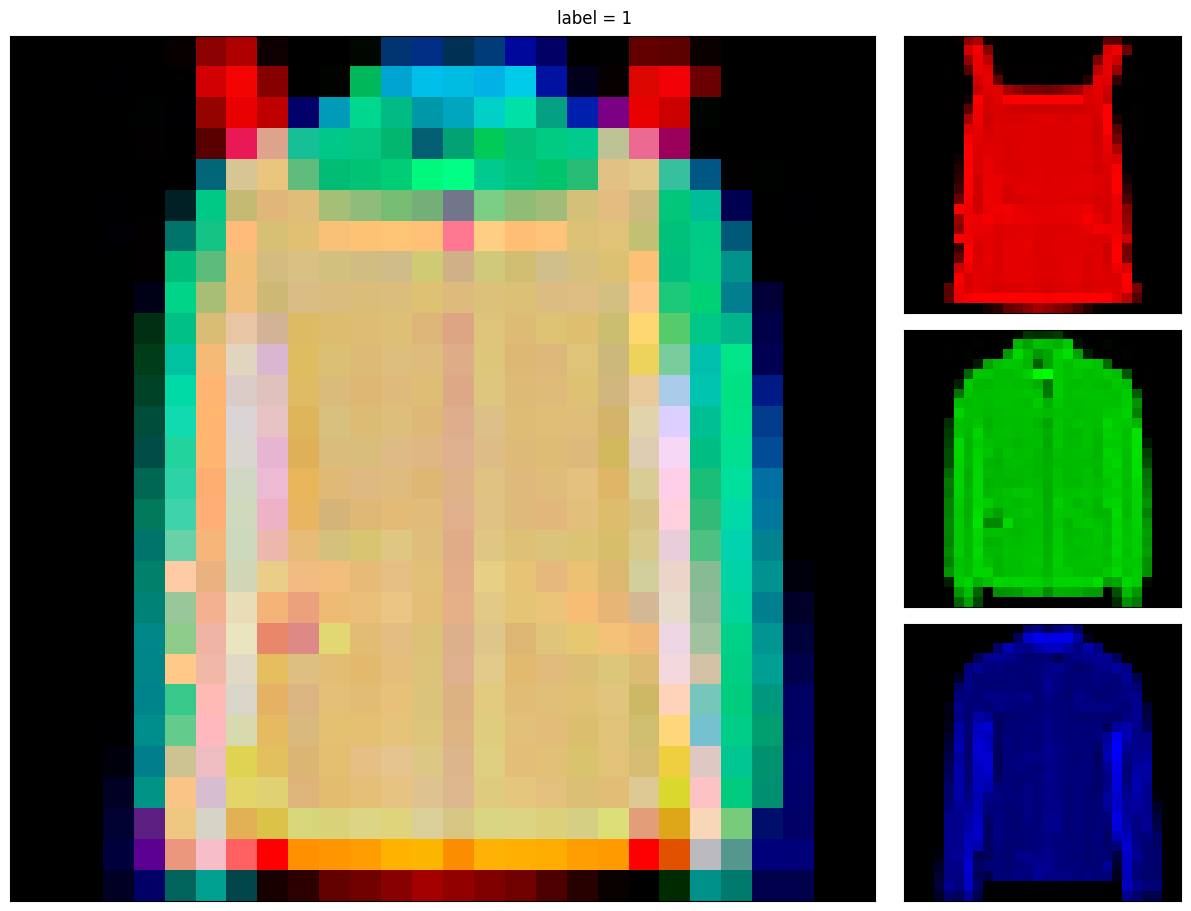
Figure 1: Example image from the FMNISTMash dataset, class label is 1

Your task is to produce TWO models for predicting the class of the image. Note: you can do ONE model which splits the image into its separate colour channels and performs a classification on them separately, but the other MUST work on all three chanels together.

Some hints:
- The code below shows you how to load and view the data.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it. Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

To load the data, we reccomend storing it in your Google Drive, this means you won't need to load it into the local colab storage every time you open the notebook.

The following import will allow your notebook to connect to Google Drive. When you run this cell a seperate window will pop up asking you to grant Drive access to colab. Grant it access to the account which contains FMNISTMash

## Load the data

The dataset is stored as six Numpy files, so to load them we will need to import Numpy. Before loading each file into its own vaiable.

**Note: you'll need to change the location of the file to wherever you stroed your files.**

In [ ]:
import numpy as np

train_x = np.load('/content/drive/MyDrive/data/FMNISTMash/train_x.npy', allow_pickle = True)
train_y = np.load('/content/drive/MyDrive/data/FMNISTMash/train_y.npy', allow_pickle = True)
valid_x = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_x.npy', allow_pickle = True)
valid_y = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_y.npy', allow_pickle = True)
test_x = np.load('/content/drive/MyDrive/data/FMNISTMash/test_x.npy', allow_pickle = True)
test_y = np.load('/content/drive/MyDrive/data/FMNISTMash/test_y.npy', allow_pickle = True)

## Check the shape of the data
Make sure the data is loaded and in the shape that you expect, FMNISTMash has 50,000 training images, 10,000 validation images, and 10,000 testing images.

In [ ]:
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'valid_x shape: {valid_x.shape}')
print(f'valid_y shape: {valid_y.shape}')
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

train_x shape: (50000, 3, 28, 28)
train_y shape: (50000,)
valid_x shape: (10000, 3, 28, 28)
valid_y shape: (10000,)
test_x shape: (10000, 3, 28, 28)
test_y shape: (10000,)


## Displaying the Images

### Displaying the single image

To display the images we are going to be using MatPlotLib, so we need to import that, standard practice is to import it as plt

In [ ]:
import matplotlib.pyplot as plt

The following two functions aren't necessary, they simply remove the axis ticks and numbers from the rendered image and perform some normalisation to the image.

In [ ]:
def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

In [ ]:
def image_normalisation(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

We construct the figure using plt, pyplot expects the colour channel to be last, the data is saved in a channels_first format so needs to be converted which is what we used np.move_axis for.

In [ ]:
def display_image(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)
    plt.show()

## Pick a random example and plot it

We want to plot a random image, so we import random and pick a random index using the number of images in train_x as a limit.

In [ ]:
import random

ri = random.randrange(train_x.shape[0])

We now render the image, the label indicates how many different FMNIST classes appear in the image.

- 0 = All images are the same class
- 1 = Two images share the same class
- 2 = All images are from different classes

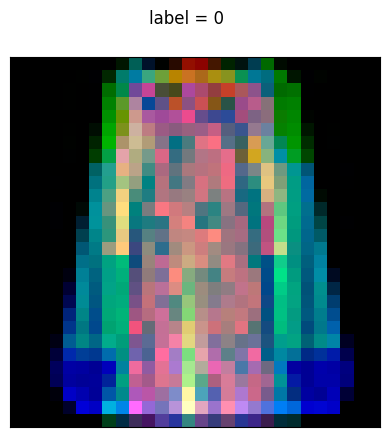

In [ ]:
display_image(train_x[ri], train_y[ri])

## Splitting the Image

This next section is just to make the dataset easier to understand. We will display the image, and then the three images that make it up seperately.

In [ ]:
def show_mnist_examples(x, y):
  fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
  gs = fig.add_gridspec(3,4)
  main_ax = fig.add_subplot(gs[:3,:3])
  fig.suptitle('label = '+ str(y))
  main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
  disable_ax_ticks(main_ax)

  for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalisation(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
  plt.show()

Hopefully, you will see the same image rendered early along with the images in the respective colour channels, and you should be able to see which ones share a class from FMNIST and which ones differ. Careful though, as some classes are similar to others.

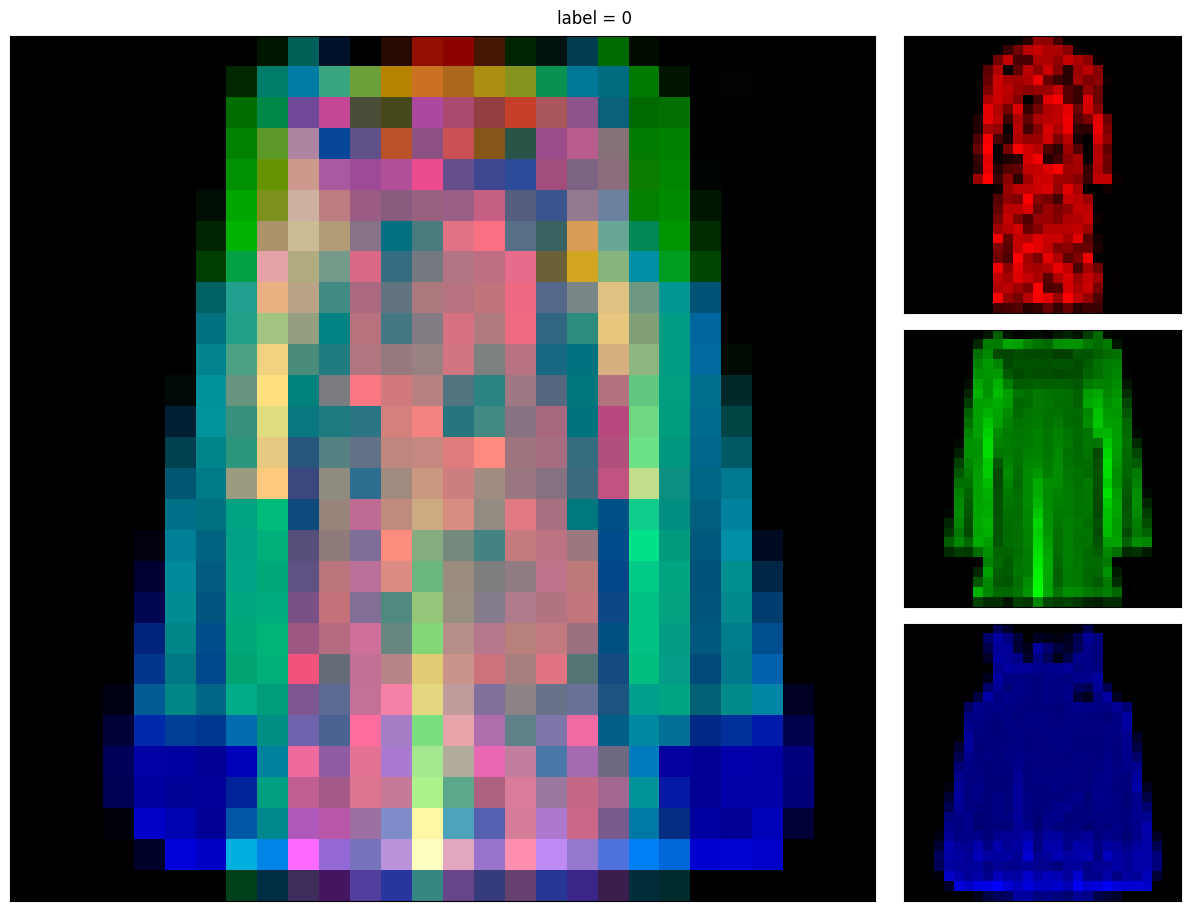

In [ ]:
show_mnist_examples(train_x[ri], train_y[ri])

## Your answer below

---
---
## Project 3: Text dataset (70 marks)

Dataset: sentiment analysis dataset (on canvas: (https://ncl.instructure.com/courses/48554/files/6271480?wrap=1), (https://ncl.instructure.com/courses/48554/files/6271483?wrap=1), (https://ncl.instructure.com/courses/48554/files/6271533?wrap=1)).

Each sample in the dataset represents a tweet. Each tweet has a sentiment label (Positive, Negative, Neutral).

**Task Description:** Apply **a combination of** different approaches including pre-processing techniques, shallow and deep classifiers, ensembled approaches, machine learning approaches beyond supervised learning if applicable, data augmentation if applicable to predict the sentiment of the test set. Try your best to improve the prediction results.

Primary **Evaluation metrics: F-1 measure**. Though you should also use others.

## Your answer below


---
---
## Project 4: Time-serise dataset (70 marks)

The Weather dataset is a time-series dataset collected by a Raspberry Pi computer at a home in Newcastle. It contains a bunch of different features about the weather collected over an approximate 12-month period. The features are as follows:

| Column no | Feature                                                  |
|-----------|----------------------------------------------------------|
|         1 | Date and time in standard Linux format                   |
|         2 | Temperature from the first internal sensor (Celsius)     |
|         3 | Outside temperature (Celsius)                            |
|         4 | CPU Temperature (Celsius)                                |
|         5 | Count (always 1)                                         |
|         6 | Temperature from the second internal sensor (Celsius)    |
|         7 | Air Pressure (mmHg)                                      |
|         8 | Humidity (percentage)                                    |

Readings are measured in one-minute intervals between November 2021 and December 2022. Your task is to try and predict future values 5, 10, 15, 30 minutes into the future along with 1, 2, 6 and 12 hours into the future. I.e. given a time-sequence of measurements before 10:20am on Friday 3rd June 2022 how accurately can you predict the values for 10:25, 10:30, 10:35 and 10:50am and for 11:20, 12:20, 16:20 and 22:20. You can do this for any of the 6 weather features (not date or count). You should separate out a test set of the last 2 months of data (you need to have a continuous and separate test set to prevent leakage between training and testing).

The dataset can be downloaded from:
http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/weather.csv

Some hints:
- There is some code below which shows you how to load and view the data to get you started.
- In order to score top marks for this dataset you should demonstrate multiple models, at least one of them should not use Deep Learning.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it.
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

## Access to the files

The file is available from: http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/log.txt

You can upload the file each time you use them, but this might take some time as they are quite large. An eisier option is to uploade them to a Google drive folder and mount this.

Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb

In the code below I have created a folder in Google drive called data and placed the file above in it.

In [ ]:
# to access google drive folder
from google.colab import drive
drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.

## Load the data

The data is stored in mumpy data files. You can use numpy.load() to read these in.

**Note: you'll need to change the location of the file to wherever you stored your files.**

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('/content/drive/MyDrive/data/log.txt', delimiter=',')

In [ ]:
print(data)

## Data structure

The columns are:
0. Date and time
1. Inside temperature 1
2. Outside temperature
3. CPU Temperature
4. Count
5. Inside temperature 2
6. Air Pressure (mmHg)
7. Humidity (%)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

plt.plot(data[:, [1]])
plt.plot(data[:, [2]])
plt.plot(data[:, [3]])
plt.plot(data[:, [4]])
plt.plot(data[:, [5]])
plt.plot(data[:, [6]])
plt.plot(data[:, [7]])

## Your answer below